In [1]:
# Data manipulation libraries
import pandas as pd
import numpy as np

# Machine learning libraries
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder

# Technical indicator library
import talib as ta

# Data import library
import yfinance as yf

#Data visualisation
import plotly.io as pio
pio.renderers.default = "notebook_connected"
import plotly.graph_objs as go
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
#sys.path.append('c:/Users/ivanz/Documents/trading/SVM_ALGO/')
from utils import *

%load_ext autoreload
%autoreload 2

### Loading Prepared Data from CSV file

In [2]:
df = pd.read_csv('data/data_tesla_modeling_3_29.csv', index_col='Datetime')
df.head(2)

,Open,High,Low,Close,Adj Close,Volume,RSI,SMA,Corr,SAR,...,return1,return2,return3,return4,return5,return6,return7,return8,return9,Signal
Datetime,,,,,,,,,,,,,,,,,,,,,
2022-03-29 09:50:00-04:00,1088.0,1089.689941,1087.719971,1089.339966,1089.339966,146662,25.544758,1096.660742,0.093291,1100.199951,...,-0.000633,-0.006897,-0.003409,0.002735,0.000000,0.000912,-0.001594,0.000684,0.000912,1
2022-03-29 09:51:00-04:00,1089.5,1092.659302,1089.229980,1090.550049,1090.550049,126722,28.132768,1096.172742,0.486579,1097.845972,...,0.001379,-0.000633,-0.006897,-0.003409,0.002735,0.000000,0.000912,-0.001594,0.000684,-1


In [3]:
# Create a variable split that stores 80% of the length of the dataframe
t = .8
split = int(t*len(df))
split

295

### Data Cleaning

In [17]:
# Use drop method to drop the columns
X = df.drop(['Close', 'Signal', 'High', 'Low', 'Volume', 'Ret', 'Adj Close'], axis=1)
# Create a variable which contains all the 'Signal' values
Y = df['Signal']

In [5]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

In [6]:
sc = StandardScaler()
X_train = sc.fit_transform(X[:split])
X_test = sc.fit_transform(X[split:])

In [8]:
len(df.columns)

27

In [26]:
# define baseline model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(42, input_dim=20, activation='relu'))
	model.add(Dense(21, activation='relu'))
	model.add(Dense(10, activation='relu'))
	model.add(Dense(3, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [27]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose=0)

In [28]:
# kfold = KFold(n_splits=10, shuffle=True)

In [29]:
estimator.fit(X_train, Y[:split])

In [30]:
predictions = estimator.predict(X_test)
predictions

array([ 1, -1,  0,  1,  0,  0,  0, -1,  0, -1, -1,  0,  1,  0,  1, -1,  1,
        1,  1,  1, -1,  0,  1,  1, -1, -1,  0, -1,  0,  0,  0,  1,  1,  1,
       -1, -1,  1,  0,  0,  1, -1, -1,  0,  1, -1,  1, -1,  0,  0,  1, -1,
       -1, -1,  1,  1,  0, -1, -1, -1, -1,  1, -1, -1,  0,  1,  1,  0,  1,
       -1, -1,  1,  1,  0, -1], dtype=int64)

In [31]:
cm = confusion_matrix(Y[split:], predictions)
cm

array([[10,  5,  3],
       [13, 11, 14],
       [ 4,  5,  9]], dtype=int64)

In [32]:
cr = classification_report(Y[split:], predictions)
print(cr)

              precision    recall  f1-score   support

          -1       0.37      0.56      0.44        18
           0       0.52      0.29      0.37        38
           1       0.35      0.50      0.41        18

    accuracy                           0.41        74
   macro avg       0.41      0.45      0.41        74
weighted avg       0.44      0.41      0.40        74



### Create hyperparameters optimal search function for SVC algorithm

### Apply RendomizedSearch to train data for best params

### Train Classifier with best params

### Predictions on test Set

In [112]:
# # Pass the test data to the predict function and store the values into 'y_predict'
# y_predict = cls.predict(ss1.transform(X.iloc[split:]))

# Initiate a column by name, 'Pred_Signal' and assign 0 to it
df['Pred_Signal'] = 0

In [62]:
y_predict

array([ 0,  0,  1,  1,  0,  0,  1,  0,  0,  0,  0,  1, -1, -1,  1, -1,  0,
        1, -1,  1,  0,  0,  0,  1, -1,  0, -1,  0,  0, -1, -1,  1, -1,  0,
        0, -1,  0,  0,  1,  0,  0,  0, -1, -1,  0, -1,  0,  0,  1,  0,  1,
       -1, -1,  0, -1,  1, -1, -1, -1,  1,  1,  1, -1,  0,  0,  0, -1,  1,
       -1,  0,  0,  1,  1,  0], dtype=int64)

In [113]:
# # Save the predicted values for the train data
# df.iloc[:split, df.columns.get_loc('Pred_Signal')] = pd.Series(
#     cls.predict(ss1.transform(X.iloc[:split])).tolist())

# Save the predicted values for the test data
df.iloc[split:, df.columns.get_loc('Pred_Signal')] = predictions

In [116]:
# Calculate strategy returns and store them in 'Ret1' column
df['Ret1'] = df['Ret']*df['Pred_Signal']
# Calculate the confusion matrix
# cm = confusion_matrix(y[split:], y_predict)
# cm

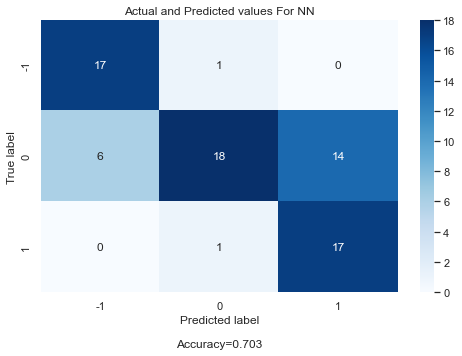

In [126]:
make_confusion_matrix(cf=cm, 
                      categories=['-1', '0', '1'], figsize=(8,5), percent=False,
                      title="Actual and Predicted values For NN")

In [119]:
# # Calculate the classification report
# cr = classification_report(y[split:], y_predict)
# print(cr)
#declare figure
fig = go.Figure()
#Set up traces
fig.add_trace(go.Scatter(x=df[split:].index, y= (df['Ret'][split:]+1).cumprod(),line=dict(color='royalblue', width=.8), name = 'stock_returns'))
fig.add_trace(go.Scatter(x=df[split:].index, y= (df['Ret1'][split:]+1).cumprod(),line=dict(color='orange', width=.8), name = 'strategy_returns'))
# Add titles
fig.update_layout(
    title='Support Vector Machine Strategy',
    yaxis_title='Stock return (% Return)')

### Look At Model Predictions

In [120]:
df_pred = df[split:].copy()
df_pred = df_pred.reset_index()

df_pred.Pred_Signal = df_pred.Pred_Signal.astype(int)
df_pred.Datetime = df_pred.Datetime.apply(lambda x: x[:-6])

df_pred['Open_shift'] = df_pred['Open']-2
df_pred['Pred_Signal_switch'] = correct_signals(df_pred['Pred_Signal'])
df_pred['Signal_switch'] = correct_signals(df_pred['Signal'])
df_pred['Signal_m'] = df_pred['Signal'].apply(lambda x: ' ' if x==0 else x)
df_pred['Pred_Signal_m'] = df_pred['Pred_Signal'].apply(lambda x: ' ' if x==0 else x)
df_pred['Pred_Signal_switch'] = df_pred['Pred_Signal_switch'].apply(lambda x: ' ' if x==0 else x)
df_pred['Signal_switch'] = df_pred['Signal_switch'].apply(lambda x: ' ' if x==0 else x)

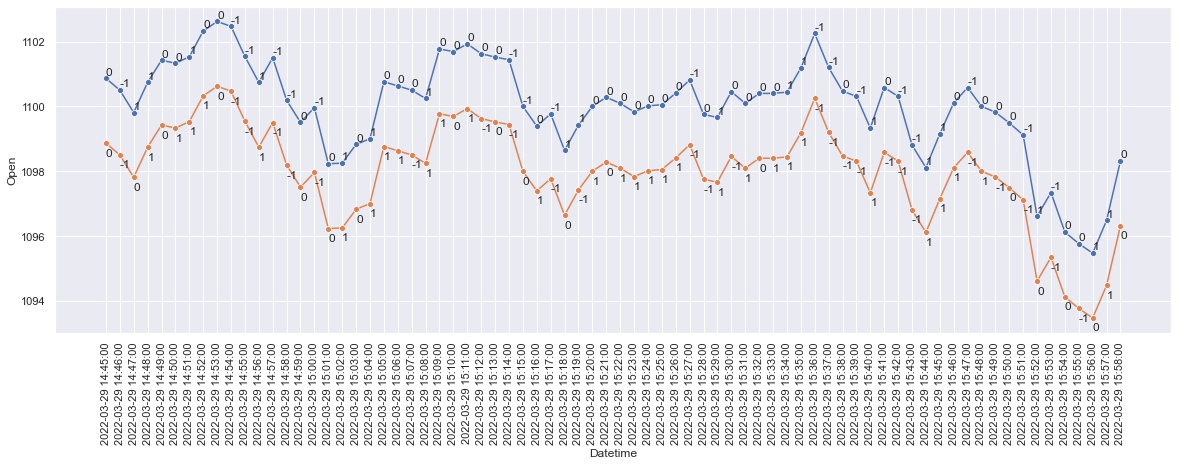

In [121]:
fig, ax = plt.subplots(figsize=(20,6))
plot = sns.lineplot(x='Datetime', y='Open', data=df_pred, marker='o')
plot = sns.lineplot(x='Datetime', y='Open_shift', data=df_pred, marker='o')
# Annotate label points 
for x,y,m in df_pred[['Datetime','Open','Signal']].values:
        ax.text(x,y+0.1,m)
for x,y,m in df_pred[['Datetime','Open_shift','Pred_Signal']].values:
        ax.text(x,y-0.4,m)
plt.setp(plot.get_xticklabels(), rotation=90)
plt.show()

### Excluding Hold Signals(Signal ==0)

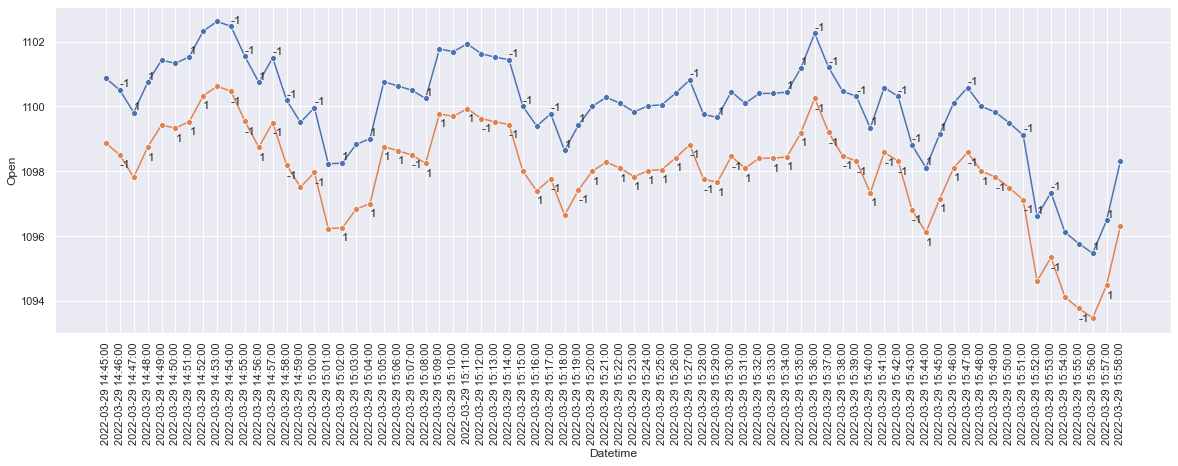

In [122]:
fig, ax = plt.subplots(figsize=(20,6))
plot = sns.lineplot(x='Datetime', y='Open', data=df_pred, marker='o')
plot = sns.lineplot(x='Datetime', y='Open_shift', data=df_pred, marker='o')
# Annotate label points 
for x,y,m in df_pred[['Datetime','Open','Signal_m']].values:
        ax.text(x,y+0.1,m)
for x,y,m in df_pred[['Datetime','Open_shift','Pred_Signal_m']].values:
        ax.text(x,y-0.4,m)
plt.setp(plot.get_xticklabels(), rotation=90)
plt.show()

### Ordering Signals for Buy and Sell

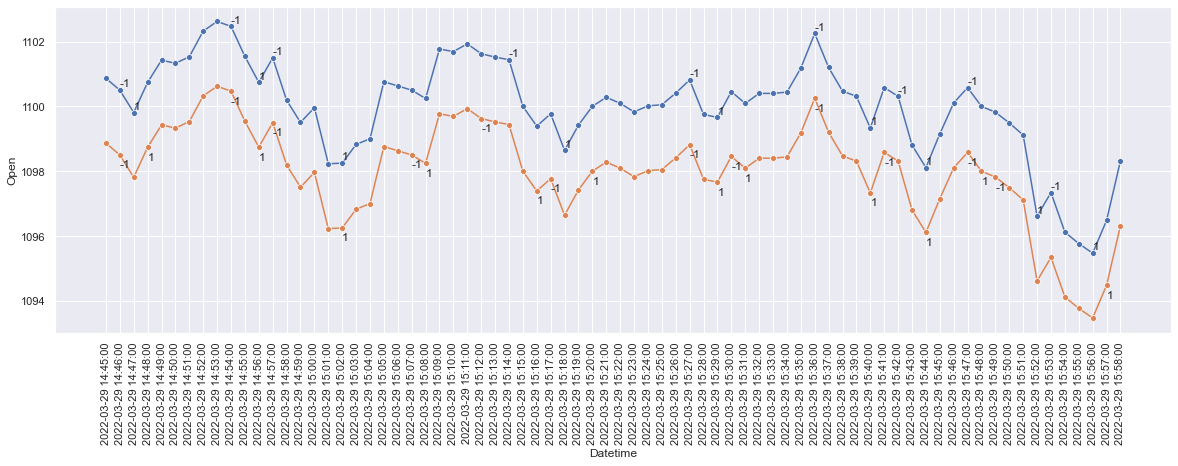

In [123]:
fig, ax = plt.subplots(figsize=(20,6))
plot = sns.lineplot(x='Datetime', y='Open', data=df_pred, marker='o')
plot = sns.lineplot(x='Datetime', y='Open_shift', data=df_pred, marker='o')
# Annotate label points 
for x,y,m in df_pred[['Datetime','Open','Signal_switch']].values:
        ax.text(x,y+0.1,m)
for x,y,m in df_pred[['Datetime','Open_shift','Pred_Signal_switch']].values:
        ax.text(x,y-0.4,m)
plt.setp(plot.get_xticklabels(), rotation=90)
plt.show()

In [21]:
df_pred.to_csv('../algo_logistic/results_keras.scv', index=False)